#**Project 2** 

**Jacob - 001299743** \
**Supreet - 002687930** \
**Samarth - 002780999**  

**Task 1**

In [112]:
#importing important libraries from the packages to carry out the tasks

from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [113]:
#installing necessary packages to perform the tasks
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycairo-1.23.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-pyth

In [79]:
#mounting our personal google drive folder where we have stored all the data 

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Project2

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Project2


In [80]:
#listing the directory to verify if the drive has been properly mounted or not

dir = '/content/drive/MyDrive/Project2'
dir_list = os.listdir(dir)
print(dir_list)
dir_list.count

['Sub_1_acc_climbingdown_thigh.csv', 'Sub_1_acc_climbingdown_upperarm.csv', 'Sub_1_acc_climbingdown_waist.csv', 'Sub_1_acc_climbingup_shin.csv', 'Sub_1_acc_climbingup_forearm.csv', 'Sub_1_acc_walking_chest.csv', 'Sub_1_acc_running_waist.csv', 'Sub_1_acc_running_head.csv', 'Sub_1_acc_running_shin.csv', 'Sub_1_acc_climbingup_upperarm.csv', 'Sub_1_acc_climbingup_head.csv', 'Sub_1_acc_running_chest.csv', 'Sub_1_acc_walking_forearm.csv', 'Sub_1_acc_running_upperarm.csv', 'Sub_1_acc_climbingup_waist.csv', 'Sub_1_acc_climbingup_chest.csv', 'Sub_1_acc_climbingup_thigh.csv', 'Sub_1_acc_running_forearm.csv', 'Sub_1_acc_running_thigh.csv', 'Sub_1_acc_walking_head.csv', 'sub_2_acc_running_chest.csv', 'sub_2_acc_climbingup_shin.csv', 'sub_2_acc_climbingup_upperarm.csv', 'Sub_1_acc_walking_shin.csv', 'sub_2_acc_climbingdown_head.csv', 'sub_2_acc_climbingdown_upperarm.csv', 'sub_2_acc_climbingup_chest.csv', 'Sub_1_acc_walking_thigh.csv', 'Sub_1_acc_walking_upperarm.csv', 'sub_2_acc_climbingup_thigh.c

<function list.count(value, /)>

In [16]:
# going through the datasets and updating relevant information into the dataframe 
# this code takes around 4 minutes 15 seconds to run because of the huge size of the dataset

activity = pd.DataFrame(columns = ['Method', 'Subject', 'Accelerometer', 'Average_Degree', 'Network_Diameter', 'Average Path Lengeth', 'Activity', 'Classification'])
axis = ['attr_x', 'attr_y', 'attr_z']
method = ['HVG', 'NVG']
for m in method:
  if m == 'NVG':
    for a in axis:
      acc = a.split('_')[1].capitalize()
      for file in dir_list:
        df = pd.read_csv(file)
        df = df.iloc[1000:2024]
        g = NaturalVG()
        g.build(df[a])
        ig_g = g.as_igraph()
        Average_Degree = np.mean(ig_g.degree())
        Network_Diameter = ig_g.diameter()
        Average_Path_Length = ig_g.average_path_length()
        sensor_location = file.split('_')[4].split('.')[0].capitalize()
        act = file.split('_')[3].capitalize()
        sub = file.split('_')[1]
        activity=activity.append({'Method': m , 'Subject' : sub, 'Accelerometer' : acc, 'Average_Degree' : Average_Degree, 'Network_Diameter' : Network_Diameter, 'Average Path Lengeth' : Average_Path_Length, 'Activity' : act, 'Classification' : sensor_location},ignore_index=True)
  else:
    for a in axis:
      acc = a.split('_')[1].capitalize()
      for file in dir_list:
        df = pd.read_csv(file)
        df = df.iloc[1000:2024]
        g = HorizontalVG()
        g.build(df[a])
        ig_g = g.as_igraph()
        Average_Degree = np.mean(ig_g.degree())
        Network_Diameter = ig_g.diameter()
        Average_Path_Length = ig_g.average_path_length()
        sensor_location = file.split('_')[4].split('.')[0].capitalize()
        act = file.split('_')[3].capitalize()
        sub = file.split('_')[1]
        activity=activity.append({'Method': m , 'Subject' : sub, 'Accelerometer' : acc, 'Average_Degree' : Average_Degree, 'Network_Diameter' : Network_Diameter, 'Average Path Lengeth' : Average_Path_Length, 'Activity' : act, 'Classification' : sensor_location},ignore_index=True)
activity

Streaming output truncated to the last 5000 lines.
<ipython-input-16-e5a7f0fef438>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  activity=activity.append({'Method': m , 'Subject' : sub, 'Accelerometer' : acc, 'Average_Degree' : Average_Degree, 'Network_Diameter' : Network_Diameter, 'Average Path Lengeth' : Average_Path_Length, 'Activity' : act, 'Classification' : sensor_location},ignore_index=True)
<ipython-input-16-e5a7f0fef438>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  activity=activity.append({'Method': m , 'Subject' : sub, 'Accelerometer' : acc, 'Average_Degree' : Average_Degree, 'Network_Diameter' : Network_Diameter, 'Average Path Lengeth' : Average_Path_Length, 'Activity' : act, 'Classification' : sensor_location},ignore_index=True)
<ipython-input-16-e5a7f0fef438>:39: FutureWarning: The frame.

Method Subject Accelerometer  Average_Degree Network_Diameter  \
0       HVG       1             X        3.970703               23   
1       HVG       1             X        3.972656               27   
2       HVG       1             X        3.878906               58   
3       HVG       1             X        3.966797               21   
4       HVG       1             X        3.933594               39   
...     ...     ...           ...             ...              ...   
2569    NVG      15             Z        8.447266               11   
2570    NVG      15             Z       12.560547               11   
2571    NVG       1             Z       12.474609               10   
2572    NVG       1             Z        9.490234                9   
2573    NVG       1             Z       12.644531               10   

      Average Path Lengeth      Activity Classification  
0                 9.796642  Climbingdown          Thigh  
1                12.887710  Climbingdown       Upperarm  
2                21.653424  Climbingdown          Waist  
3                 8.596936    Climbingup           Shin  
4                16.285004    Climbingup        Forearm  
...                    ...           ...            ...  
2569              4.786348       Running           Head  
2570              4.677253    Climbingup       Upperarm  
2571              4.263013  Climbingdown        Forearm  
2572              4.445956  Climbingdown           Shin  
2573              4.611320  Climbingdown           Head  

[2574 rows x 8 columns]

In [81]:
# creating a copy of the above generated dataframe which has all the relevant information regarding average degree, network diameter, and average path length

df2 = activity.copy()

In [82]:
#displaying the copied dataframe

df2

Method Subject Accelerometer  Average_Degree Network_Diameter  \
0       HVG       1             X        3.970703               23   
1       HVG       1             X        3.972656               27   
2       HVG       1             X        3.878906               58   
3       HVG       1             X        3.966797               21   
4       HVG       1             X        3.933594               39   
...     ...     ...           ...             ...              ...   
2569    NVG      15             Z        8.447266               11   
2570    NVG      15             Z       12.560547               11   
2571    NVG       1             Z       12.474609               10   
2572    NVG       1             Z        9.490234                9   
2573    NVG       1             Z       12.644531               10   

      Average Path Lengeth      Activity Classification  
0                 9.796642  Climbingdown          Thigh  
1                12.887710  Climbingdown       Upperarm  
2                21.653424  Climbingdown          Waist  
3                 8.596936    Climbingup           Shin  
4                16.285004    Climbingup        Forearm  
...                    ...           ...            ...  
2569              4.786348       Running           Head  
2570              4.677253    Climbingup       Upperarm  
2571              4.263013  Climbingdown        Forearm  
2572              4.445956  Climbingdown           Shin  
2573              4.611320  Climbingdown           Head  

[2574 rows x 8 columns]

In [83]:
#creating two separate dataframes, one for walking and running and the other one for climbing up and climbing down

df_rw = df2[(df2['Activity'] == 'Running') | (df2['Activity'] == 'Walking')]
df_ud = df2[(df2['Activity'] == 'Climbingup') | (df2['Activity'] == 'Climbingdown')]

In [84]:
#displaying the running-walking dataframe

df_rw

Method Subject Accelerometer  Average_Degree Network_Diameter  \
5       HVG       1             X        3.958984               26   
6       HVG       1             X        3.859375               76   
7       HVG       1             X        3.953125               31   
8       HVG       1             X        3.962891               17   
11      HVG       1             X        3.962891               22   
...     ...     ...           ...             ...              ...   
2565    NVG      15             Z       11.617188               11   
2566    NVG      15             Z        9.318359               12   
2567    NVG      15             Z        8.017578                9   
2568    NVG      15             Z       11.511719               13   
2569    NVG      15             Z        8.447266               11   

      Average Path Lengeth Activity Classification  
5                11.578024  Walking          Chest  
6                26.356253  Running          Waist  
7                10.856393  Running           Head  
8                 8.209611  Running           Shin  
11                7.543843  Running          Chest  
...                    ...      ...            ...  
2565              4.747169  Walking        Forearm  
2566              4.945985  Walking          Chest  
2567              4.651544  Running          Chest  
2568              4.825032  Walking       Upperarm  
2569              4.786348  Running           Head  

[1260 rows x 8 columns]

In [85]:
#displaying the climbing up-climbing down dataframe

df_ud

Method Subject Accelerometer  Average_Degree Network_Diameter  \
0       HVG       1             X        3.970703               23   
1       HVG       1             X        3.972656               27   
2       HVG       1             X        3.878906               58   
3       HVG       1             X        3.966797               21   
4       HVG       1             X        3.933594               39   
...     ...     ...           ...             ...              ...   
2560    NVG      15             Z       12.164062               15   
2570    NVG      15             Z       12.560547               11   
2571    NVG       1             Z       12.474609               10   
2572    NVG       1             Z        9.490234                9   
2573    NVG       1             Z       12.644531               10   

      Average Path Lengeth      Activity Classification  
0                 9.796642  Climbingdown          Thigh  
1                12.887710  Climbingdown       Upperarm  
2                21.653424  Climbingdown          Waist  
3                 8.596936    Climbingup           Shin  
4                16.285004    Climbingup        Forearm  
...                    ...           ...            ...  
2560              5.255184    Climbingup          Thigh  
2570              4.677253    Climbingup       Upperarm  
2571              4.263013  Climbingdown        Forearm  
2572              4.445956  Climbingdown           Shin  
2573              4.611320  Climbingdown           Head  

[1314 rows x 8 columns]

In [86]:
#defining axes for our NVG and HVG for walking and running

df_rw_x = df_rw[df_rw['Accelerometer'] == 'X']
df_rw_x_hvg = df_rw_x[df_rw_x['Method'] == 'HVG']
df_rw_x_nvg = df_rw_x[df_rw_x['Method'] == 'NVG']

df_rw_y = df_rw[df_rw['Accelerometer'] == 'Y']
df_rw_y_hvg = df_rw_y[df_rw_y['Method'] == 'HVG']
df_rw_y_nvg = df_rw_y[df_rw_y['Method'] == 'NVG']

df_rw_z = df_rw[df_rw['Accelerometer'] == 'Z']
df_rw_z_hvg = df_rw_z[df_rw_z['Method'] == 'HVG']
df_rw_z_nvg = df_rw_z[df_rw_z['Method'] == 'NVG']

In [87]:
#defining axes for our NVG and HVG for climbing up and climbing down

df_ud_x = df_ud[df_ud['Accelerometer'] == 'X']
df_ud_x_hvg = df_ud_x[df_ud_x['Method'] == 'HVG']
df_ud_x_nvg = df_ud_x[df_ud_x['Method'] == 'NVG']

df_ud_y = df_ud[df_ud['Accelerometer'] == 'Y']
df_ud_y_hvg = df_ud_y[df_ud_y['Method'] == 'HVG']
df_ud_y_nvg = df_ud_y[df_ud_y['Method'] == 'NVG']

df_ud_z = df_ud[df_ud['Accelerometer'] == 'Z']
df_ud_z_hvg = df_ud_z[df_ud_z['Method'] == 'HVG']
df_ud_z_nvg = df_ud_z[df_ud_z['Method'] == 'NVG']

[Text(0.5, 1.0, 'Attribute z (NVG)')]

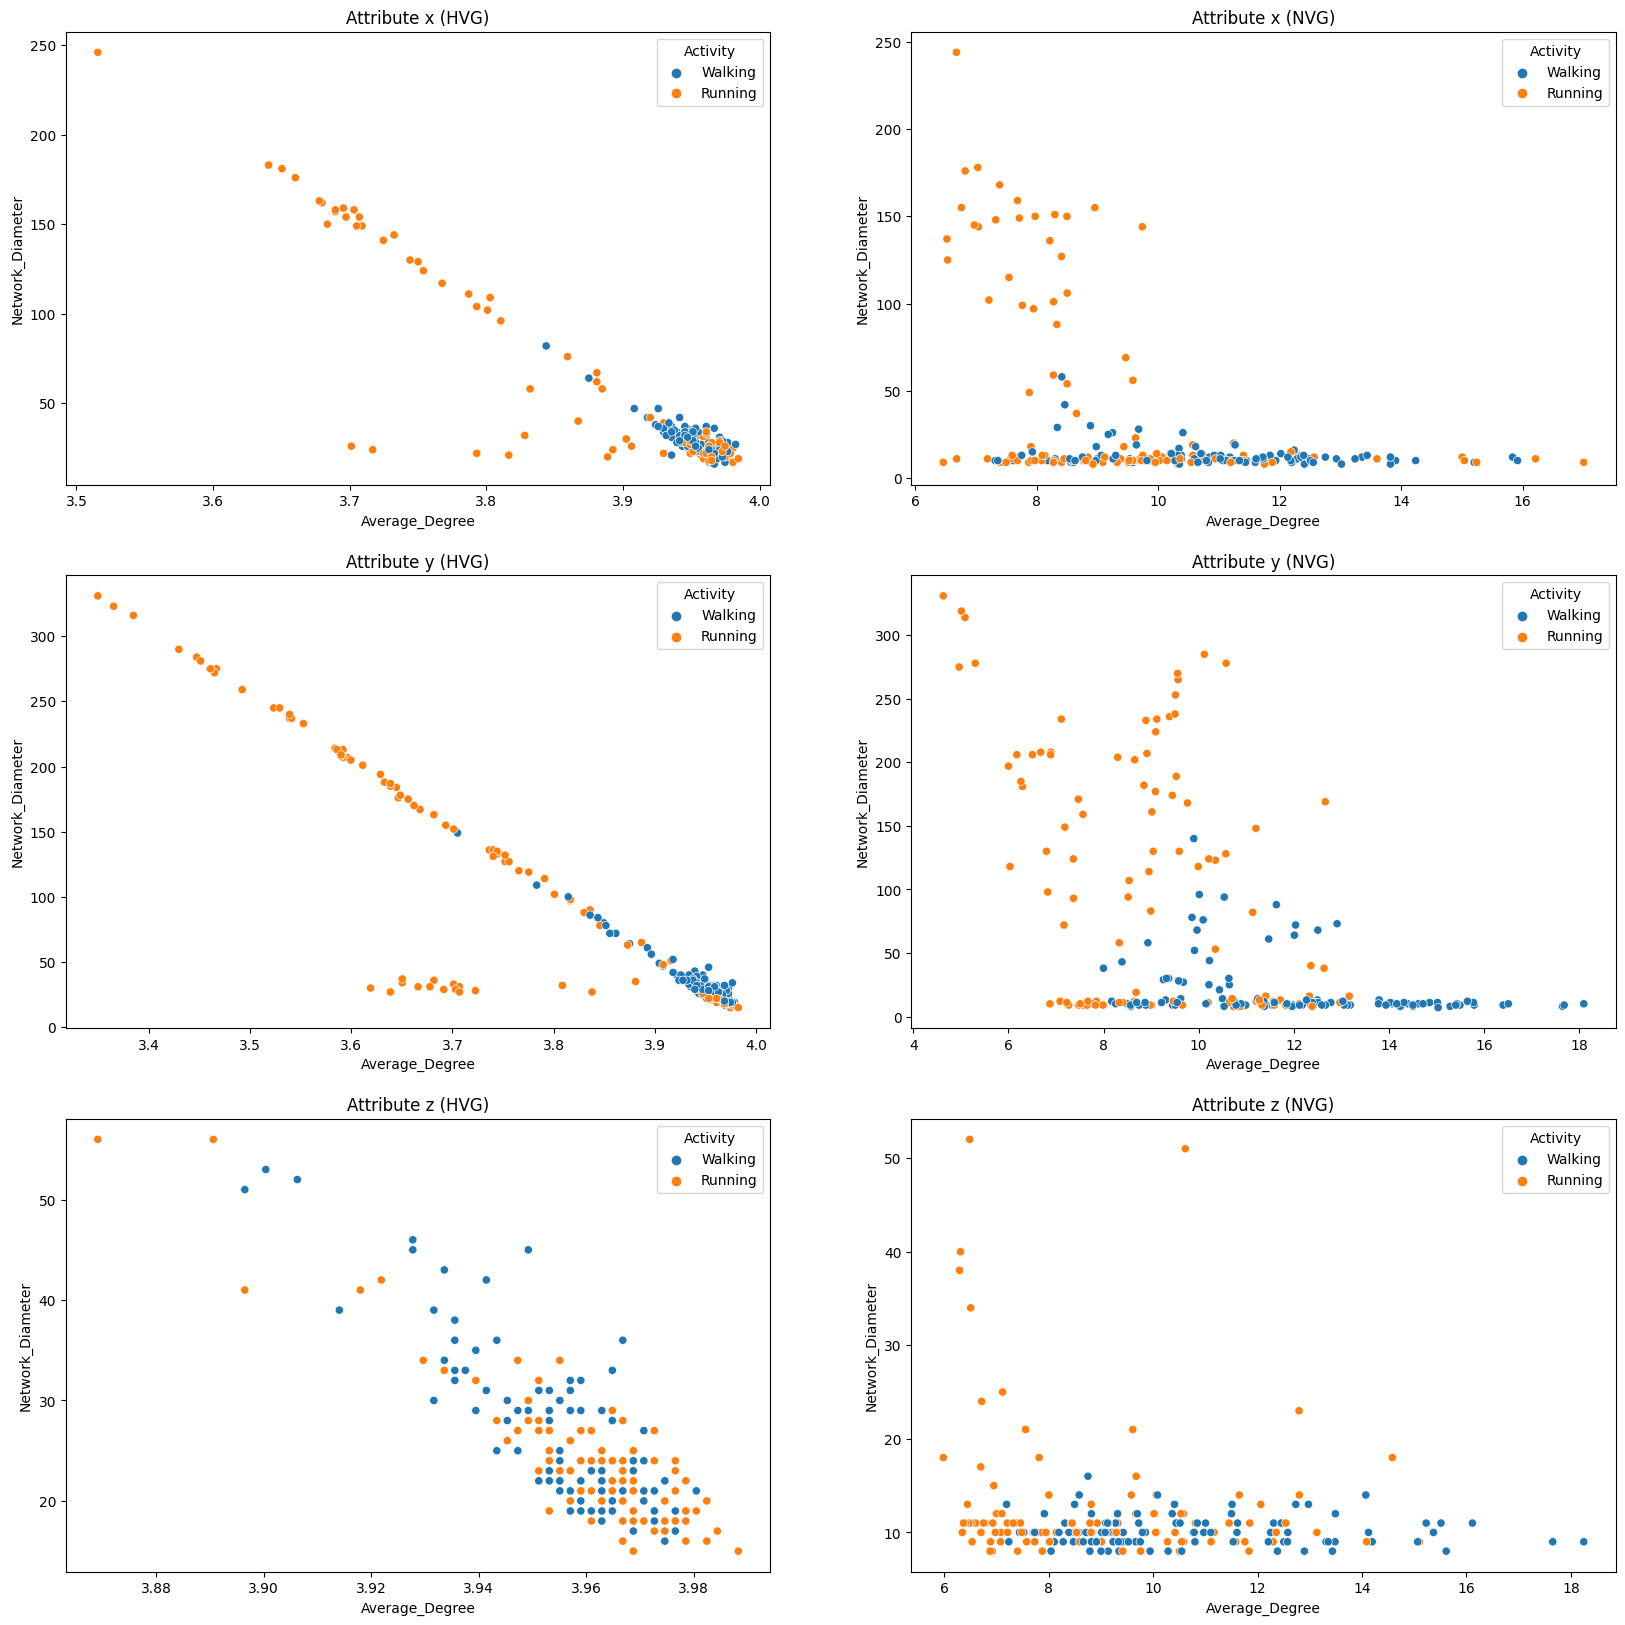

In [89]:
#generating the necessary scatter plots for running and walking (Average Degree vs Network Diameter)

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = (20, 20))
sns.scatterplot(x =df_rw_x_hvg['Average_Degree'], y = df_rw_x_hvg['Network_Diameter'], hue = df_rw_x_hvg['Activity'], data = df_rw_x_hvg, ax = ax1).set(title = 'Attribute x (HVG)')
sns.scatterplot(x =df_rw_x_nvg['Average_Degree'], y = df_rw_x_nvg['Network_Diameter'], hue = df_rw_x_nvg['Activity'], data = df_rw_x_nvg, ax = ax2).set(title = 'Attribute x (NVG)')

sns.scatterplot(x = df_rw_y_hvg['Average_Degree'], y = df_rw_y_hvg['Network_Diameter'], hue = df_rw_y_hvg['Activity'], data = df_rw_y_hvg, ax = ax3).set(title = 'Attribute y (HVG)')
sns.scatterplot(x = df_rw_y_nvg['Average_Degree'], y = df_rw_y_nvg['Network_Diameter'], hue = df_rw_y_nvg['Activity'], data = df_rw_y_nvg, ax = ax4).set(title = 'Attribute y (NVG)')

sns.scatterplot(x = df_rw_z_hvg['Average_Degree'], y = df_rw_z_hvg['Network_Diameter'], hue = df_rw_z_hvg['Activity'], data = df_rw_z_hvg, ax = ax5).set(title = 'Attribute z (HVG)')
sns.scatterplot(x = df_rw_z_nvg['Average_Degree'], y = df_rw_z_nvg['Network_Diameter'], hue = df_rw_z_nvg['Activity'], data = df_rw_z_nvg, ax = ax6).set(title = 'Attribute z (NVG)')

[Text(0.5, 1.0, 'Attribute z (NVG)')]

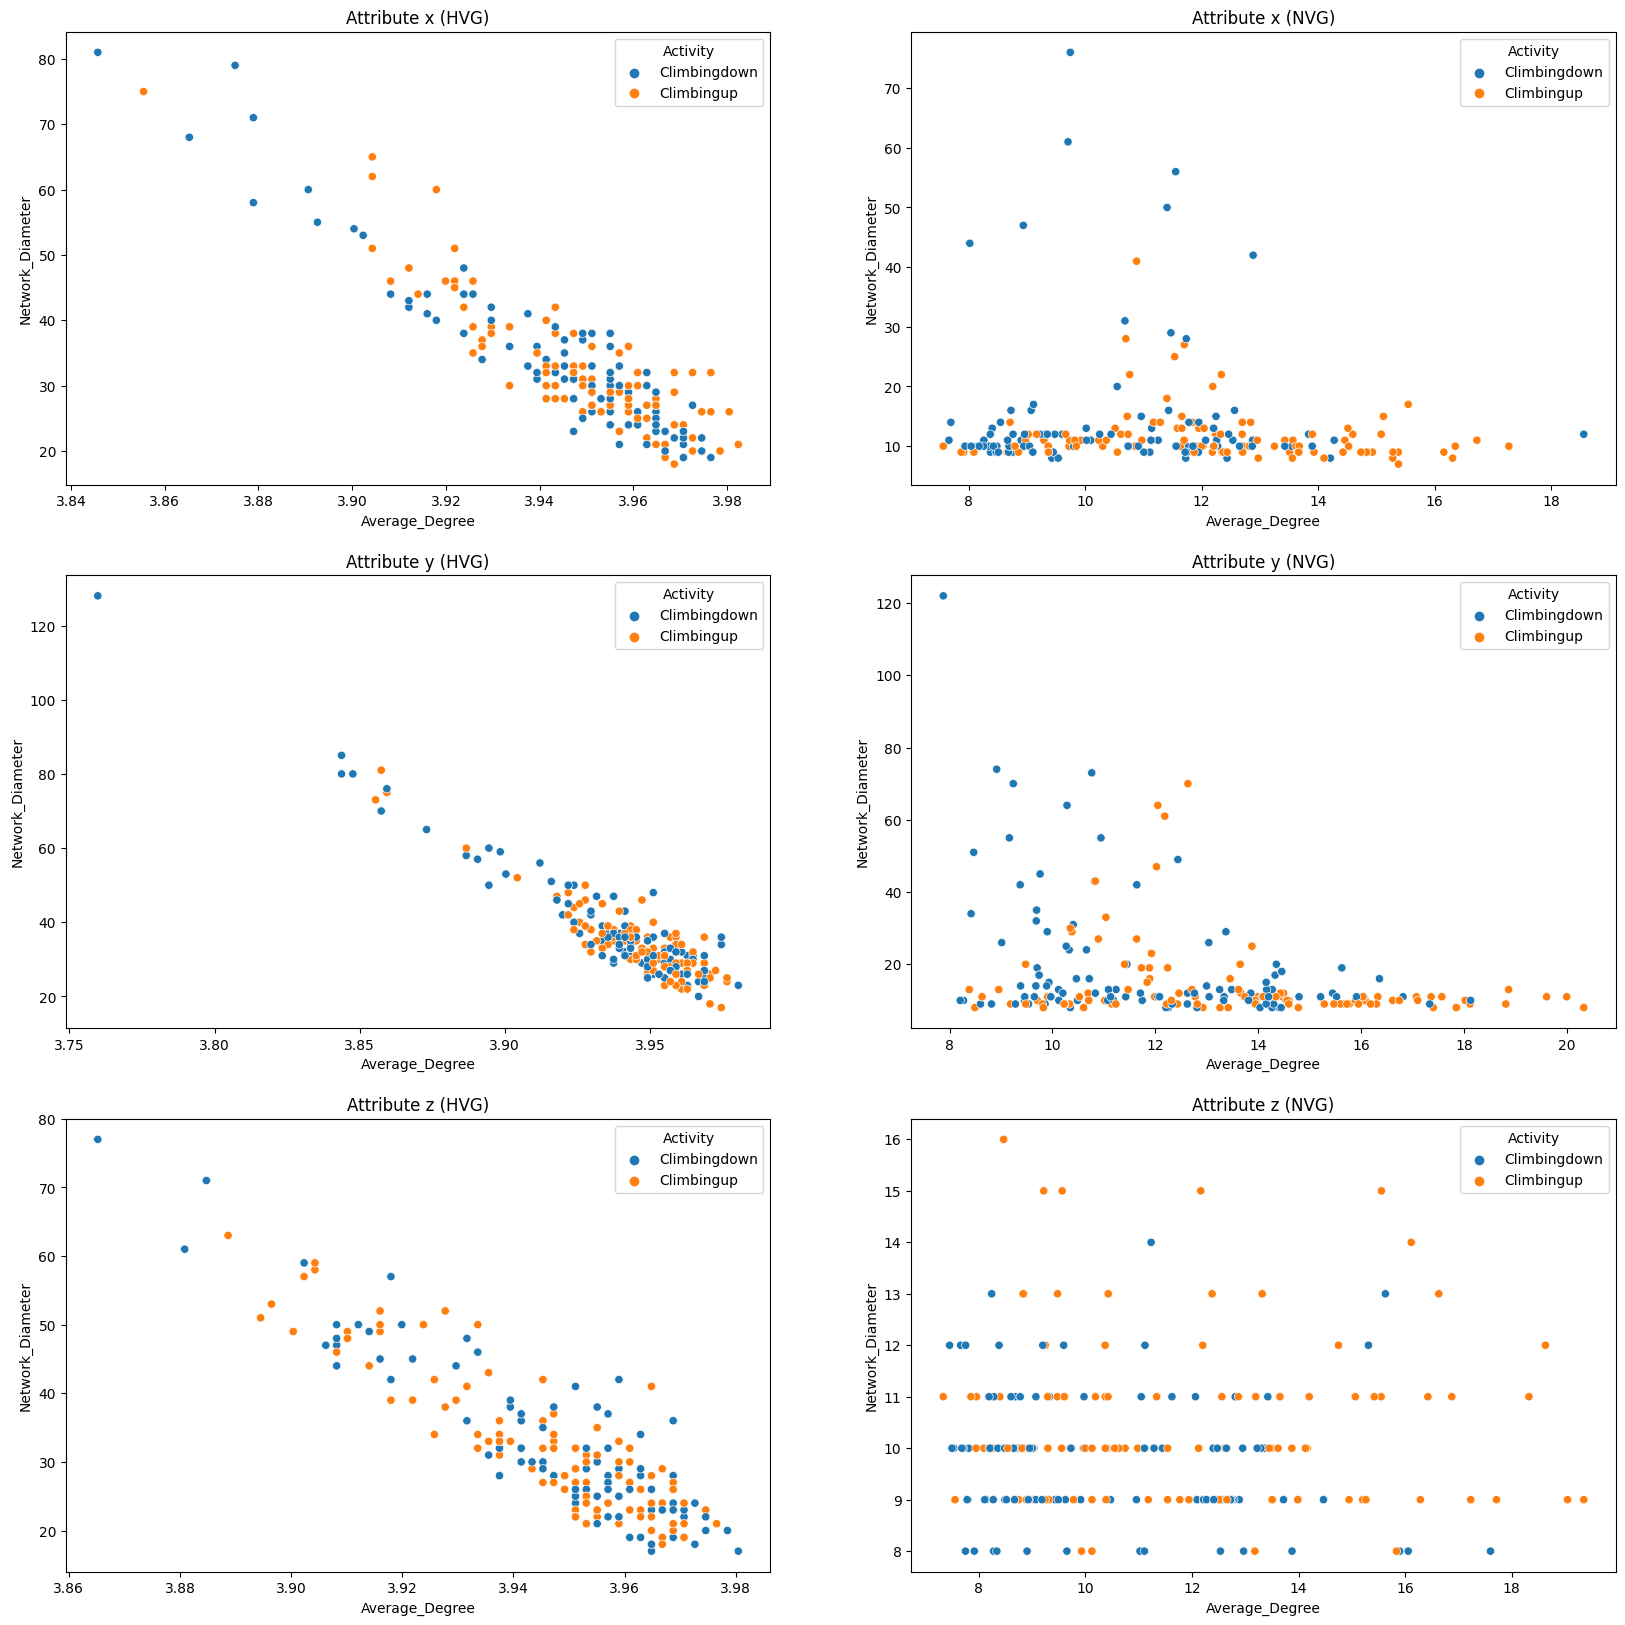

In [90]:
#generating the necessary scatter plots for climbing up and climbing down (Average Degree vs Network Diameter)

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize = (20, 20))
sns.scatterplot(x = df_ud_x_hvg['Average_Degree'], y = df_ud_x_hvg['Network_Diameter'], hue = df_ud_x_hvg['Activity'], data = df_ud_x_hvg, ax = ax1).set(title = 'Attribute x (HVG)')
sns.scatterplot(x = df_ud_x_nvg['Average_Degree'], y = df_ud_x_nvg['Network_Diameter'], hue = df_ud_x_nvg['Activity'], data = df_ud_x_nvg, ax = ax2).set(title = 'Attribute x (NVG)')

sns.scatterplot(x = df_ud_y_hvg['Average_Degree'], y = df_ud_y_hvg['Network_Diameter'], hue = df_ud_y_hvg['Activity'], data = df_ud_y_hvg, ax = ax3).set(title = 'Attribute y (HVG)')
sns.scatterplot(x = df_ud_y_nvg['Average_Degree'], y = df_ud_y_nvg['Network_Diameter'], hue = df_ud_y_nvg['Activity'], data = df_ud_y_nvg, ax = ax4).set(title = 'Attribute y (NVG)')

sns.scatterplot(x = df_ud_z_hvg['Average_Degree'], y = df_ud_z_hvg['Network_Diameter'], hue = df_ud_z_hvg['Activity'], data = df_ud_z_hvg, ax = ax5).set(title = 'Attribute z (HVG)')
sns.scatterplot(x = df_ud_z_nvg['Average_Degree'], y = df_ud_z_nvg['Network_Diameter'], hue = df_ud_z_nvg['Activity'], data = df_ud_z_nvg, ax = ax6).set(title = 'Attribute z (NVG)')

**Task 2**

In [91]:
#importing the necessary libraries to carry out the analysis

import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#mounting the google drive that contains the datasets and displaying the directory

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Project 2
dir = '/content/drive/MyDrive/Project2'
dir_list = os.listdir(dir)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/Project 2'
/content/drive/MyDrive/Project2


In [94]:
#writing a function to calculate the shannon entropy of a frequency distribution 

def s_entropy(freq_list):
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

In [95]:
#writing a function to compute the ordinal patterns of a given time series
def ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

In [96]:
#writing a function to calculate the complexity of a given time series

def complexity(op):
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [39]:
#creating a final result dataframe with the requierd columns 
#this segment would take around 33 minutes to execute because of the large size of the data

result = pd.DataFrame(columns = ['Subject', 'Accelerometer axis', 'Signal_length', 'Dimension', 'Delay', 'Permutation entropy', 'Complexity', 'Activity', 'Classification'])
axis = ['attr_x', 'attr_y', 'attr_z']
signal_length = [1028, 2048, 4096]
dimension = [3,4,5,6]
delay = [1,2,3]
for a in axis:
  acc = a.split('_')[1].capitalize()
  for sl in signal_length:
    for d in dimension:
      for de in delay:
        for file in dir_list:
          df = pd.read_csv(file)
          ts = df[a][1:sl]
          op = ordinal_patterns(ts,d,de)
          pe = p_entropy(op)
          comp = complexity(op)
          sensor_location = file.split('_')[4].split('.')[0].capitalize()
          sub = file.split('_')[1]
          act = file.split('_')[3].capitalize()
          result = result.append({'Subject': sub, 'Accelerometer axis': acc,'Signal_length': sl, 'Dimension': d,'Delay': de, 'Permutation entropy' : pe, 'Complexity' : comp, 'Activity' : act, 'Classification' : sensor_location}, ignore_index= True)
result

Streaming output truncated to the last 5000 lines.
<ipython-input-39-34c7bdb00ce6>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Subject': sub, 'Accelerometer axis': acc,'Signal_length': sl, 'Dimension': d,'Delay': de, 'Permutation entropy' : pe, 'Complexity' : comp, 'Activity' : act, 'Classification' : sensor_location}, ignore_index= True)
<ipython-input-39-34c7bdb00ce6>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Subject': sub, 'Accelerometer axis': acc,'Signal_length': sl, 'Dimension': d,'Delay': de, 'Permutation entropy' : pe, 'Complexity' : comp, 'Activity' : act, 'Classification' : sensor_location}, ignore_index= True)
<ipython-input-39-34c7bdb00ce6>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

Subject Accelerometer axis Signal_length Dimension Delay  \
0           1                  X          1028         3     1   
1           1                  X          1028         3     1   
2           1                  X          1028         3     1   
3           1                  X          1028         3     1   
4           1                  X          1028         3     1   
...       ...                ...           ...       ...   ...   
46327      15                  Z          4096         6     3   
46328      15                  Z          4096         6     3   
46329       1                  Z          4096         6     3   
46330       1                  Z          4096         6     3   
46331       1                  Z          4096         6     3   

       Permutation entropy  Complexity      Activity Classification  
0                 0.944705    0.050353  Climbingdown          Thigh  
1                 0.839900    0.129829  Climbingdown       Upperarm  
2                 0.844535    0.128378  Climbingdown          Waist  
3                 0.960075    0.036882    Climbingup           Shin  
4                 0.873971    0.106386    Climbingup        Forearm  
...                    ...         ...           ...            ...  
46327             0.929112    0.144896       Running           Head  
46328             0.916100    0.164216    Climbingup       Upperarm  
46329             0.922017    0.144311  Climbingdown        Forearm  
46330             0.937898    0.126936  Climbingdown           Shin  
46331             0.913306    0.164848  Climbingdown           Head  

[46332 rows x 9 columns]

In [97]:
 #storing the copy of the above generated dataframe inside a new dataframe 

df3 = result.copy()

In [98]:
#creating different dataframes for running and walking 

df_rw = df3[(df3['Activity'] == 'Running') | (df3['Activity'] == 'Walking')]

#creating a different dataframe for climbing up and climbing downn 

df_ud = df3[(df3['Activity'] == 'Climbingup') | (df3['Activity'] == 'Climbingdown')]

In [99]:
#displaying the running-walking dataframe 

df_rw

Subject Accelerometer axis Signal_length Dimension Delay  \
5           1                  X          1028         3     1   
6           1                  X          1028         3     1   
7           1                  X          1028         3     1   
8           1                  X          1028         3     1   
11          1                  X          1028         3     1   
...       ...                ...           ...       ...   ...   
46323      15                  Z          4096         6     3   
46324      15                  Z          4096         6     3   
46325      15                  Z          4096         6     3   
46326      15                  Z          4096         6     3   
46327      15                  Z          4096         6     3   

       Permutation entropy  Complexity Activity Classification  
5                 0.855036    0.119829  Walking          Chest  
6                 0.785983    0.162870  Running          Waist  
7                 0.767097    0.163881  Running           Head  
8                 0.952782    0.042475  Running           Shin  
11                0.904726    0.083051  Running          Chest  
...                    ...         ...      ...            ...  
46323             0.939284    0.128425  Walking        Forearm  
46324             0.909452    0.178188  Walking          Chest  
46325             0.906471    0.174522  Running          Chest  
46326             0.936536    0.131439  Walking       Upperarm  
46327             0.929112    0.144896  Running           Head  

[22680 rows x 9 columns]

In [101]:
# here, we are assigning values to the axes and supplying values for dimensions 

df_rw_x = df_rw[(df_rw['Accelerometer axis'] == 'X') & (df_rw['Delay'] == 1) & (df_rw['Signal_length'] == 4096)]
df_rw_x_dim3 = df_rw_x[df_rw_x['Dimension'] == 3]
df_rw_x_dim4 = df_rw_x[df_rw_x['Dimension'] == 4]
df_rw_x_dim5 = df_rw_x[df_rw_x['Dimension'] == 5]
df_rw_x_dim6 = df_rw_x[df_rw_x['Dimension'] == 6]

[Text(0.5, 1.0, 'Running & Walking (Attribute-x, Dimension-6, Delay-1, Signal-4096)')]

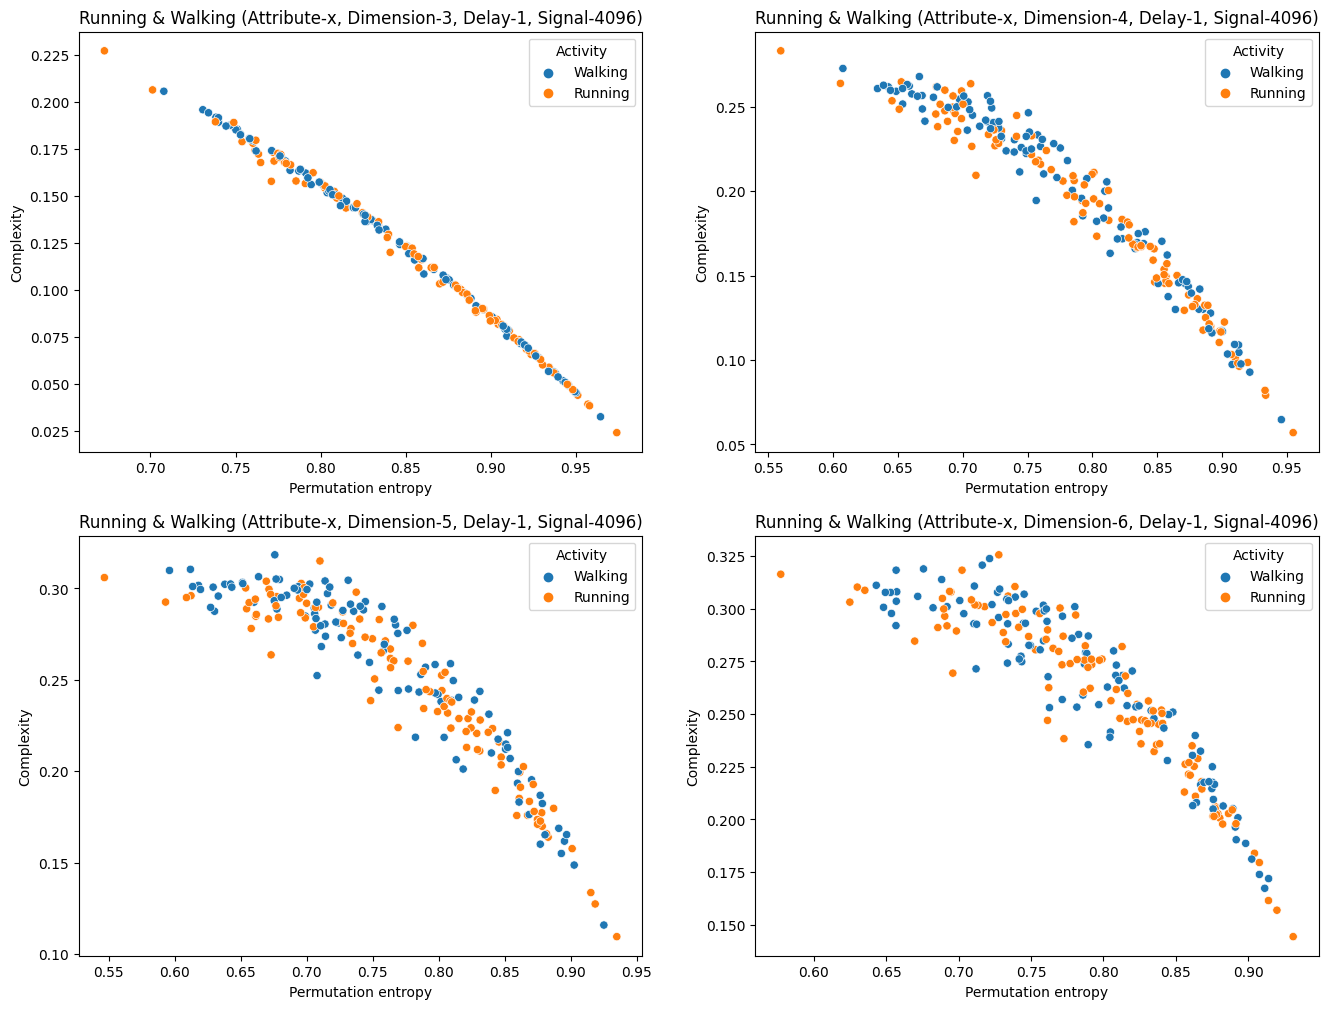

In [102]:
#creating scatter plot for running and walking 

fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize = (16,12))
sns.scatterplot(x = df_rw_x_dim3['Permutation entropy'], y = df_rw_x_dim3['Complexity'], hue = df_rw_x_dim3['Activity'], data = df_rw_x_dim3,ax = ax1).set(title = 'Running & Walking (Attribute-x, Dimension-3, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_x_dim4['Permutation entropy'], y = df_rw_x_dim4['Complexity'], hue = df_rw_x_dim4['Activity'], data = df_rw_x_dim4,ax = ax2).set(title = 'Running & Walking (Attribute-x, Dimension-4, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_x_dim5['Permutation entropy'], y = df_rw_x_dim5['Complexity'], hue = df_rw_x_dim5['Activity'], data = df_rw_x_dim5,ax = ax3).set(title = 'Running & Walking (Attribute-x, Dimension-5, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_x_dim6['Permutation entropy'], y = df_rw_x_dim6['Complexity'], hue = df_rw_x_dim6['Activity'], data = df_rw_x_dim6,ax = ax4).set(title = 'Running & Walking (Attribute-x, Dimension-6, Delay-1, Signal-4096)')


In [103]:
# here, we are assigning values to the axes and supplying values for dimensions 

df_rw_y = df_rw[(df_rw['Accelerometer axis'] == 'Y') & (df_rw['Delay'] == 1) & (df_rw['Signal_length'] == 4096)]
df_rw_y_dim3 = df_rw_y[df_rw_y['Dimension'] == 3]
df_rw_y_dim4 = df_rw_y[df_rw_y['Dimension'] == 4]
df_rw_y_dim5 = df_rw_y[df_rw_y['Dimension'] == 5]
df_rw_y_dim6 = df_rw_y[df_rw_y['Dimension'] == 6]

[Text(0.5, 1.0, 'Running & Walking (Attribute-y, Dimension-6, Delay-1, Signal-4096)')]

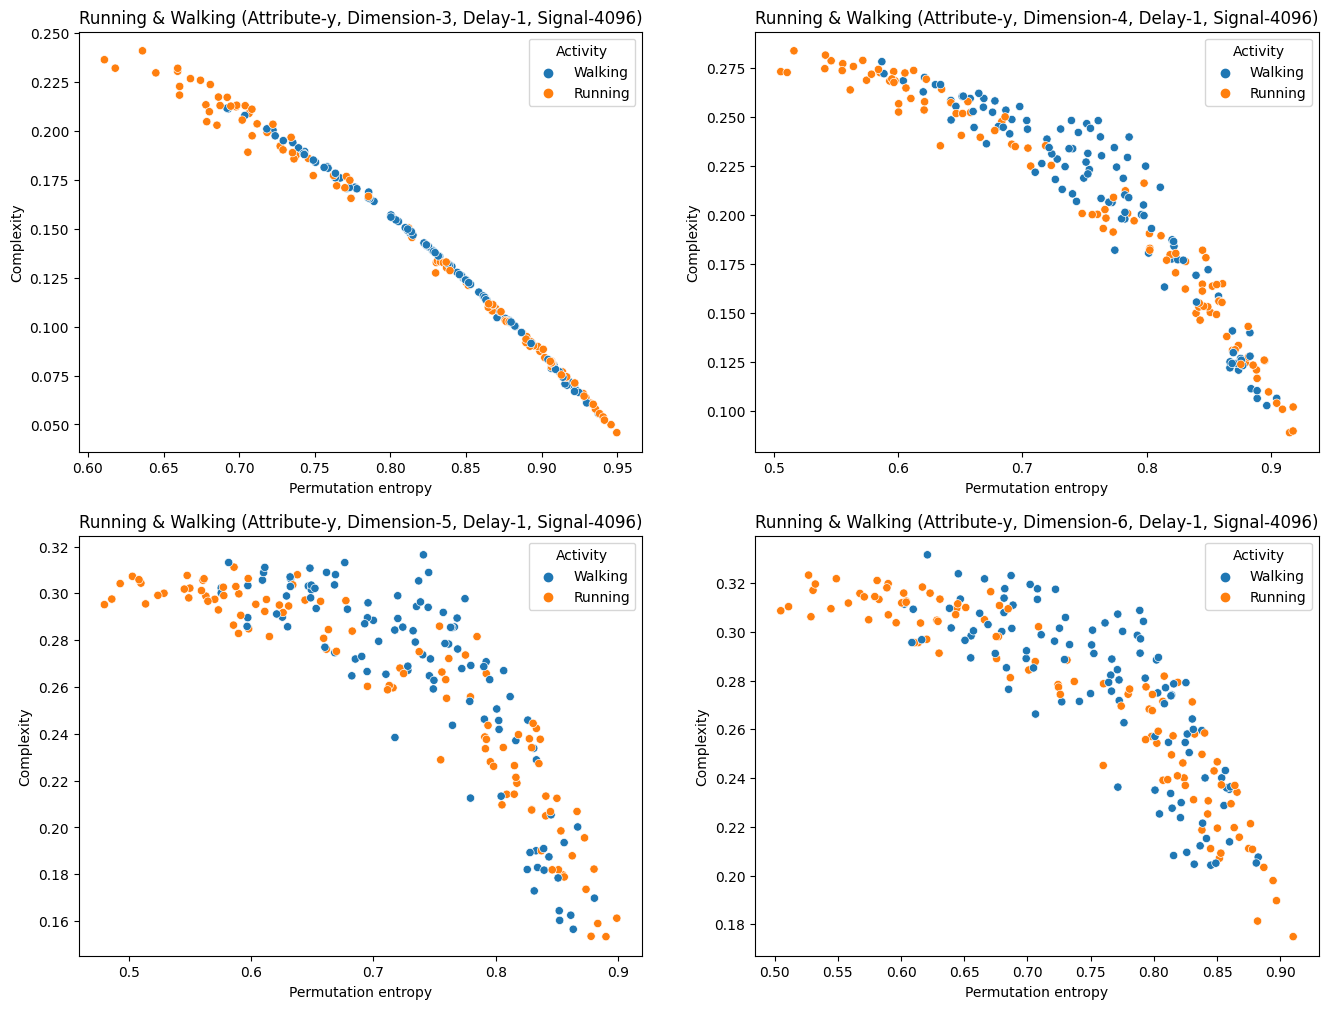

In [104]:
#creating scatter plot for running and walking 

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (16, 12))
sns.scatterplot(x = df_rw_y_dim3['Permutation entropy'], y = df_rw_y_dim3['Complexity'], hue = df_rw_y_dim3['Activity'], data = df_rw_y_dim3, ax = ax1).set(title = 'Running & Walking (Attribute-y, Dimension-3, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_y_dim4['Permutation entropy'], y = df_rw_y_dim4['Complexity'], hue = df_rw_y_dim4['Activity'], data = df_rw_y_dim4, ax = ax2).set(title = 'Running & Walking (Attribute-y, Dimension-4, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_y_dim5['Permutation entropy'], y = df_rw_y_dim5['Complexity'], hue = df_rw_y_dim5['Activity'], data = df_rw_y_dim5, ax = ax3).set(title = 'Running & Walking (Attribute-y, Dimension-5, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_y_dim6['Permutation entropy'], y = df_rw_y_dim6['Complexity'], hue = df_rw_y_dim6['Activity'], data = df_rw_y_dim6, ax = ax4).set(title = 'Running & Walking (Attribute-y, Dimension-6, Delay-1, Signal-4096)')


In [105]:
# here, we are assigning values to the axes and supplying values for dimensions 

df_rw_z = df_rw[(df_rw['Accelerometer axis'] == 'Z') & (df_rw['Delay'] == 1) & (df_rw['Signal_length'] == 4096)]
df_rw_z_dim3 = df_rw_z[df_rw_z['Dimension'] == 3]
df_rw_z_dim4 = df_rw_z[df_rw_z['Dimension'] == 4]
df_rw_z_dim5 = df_rw_z[df_rw_z['Dimension'] == 5]
df_rw_z_dim6 = df_rw_z[df_rw_z['Dimension'] == 6]

[Text(0.5, 1.0, 'Running & Walking (Attribute-z, Dimension-6, Delay-1, Signal-4096)')]

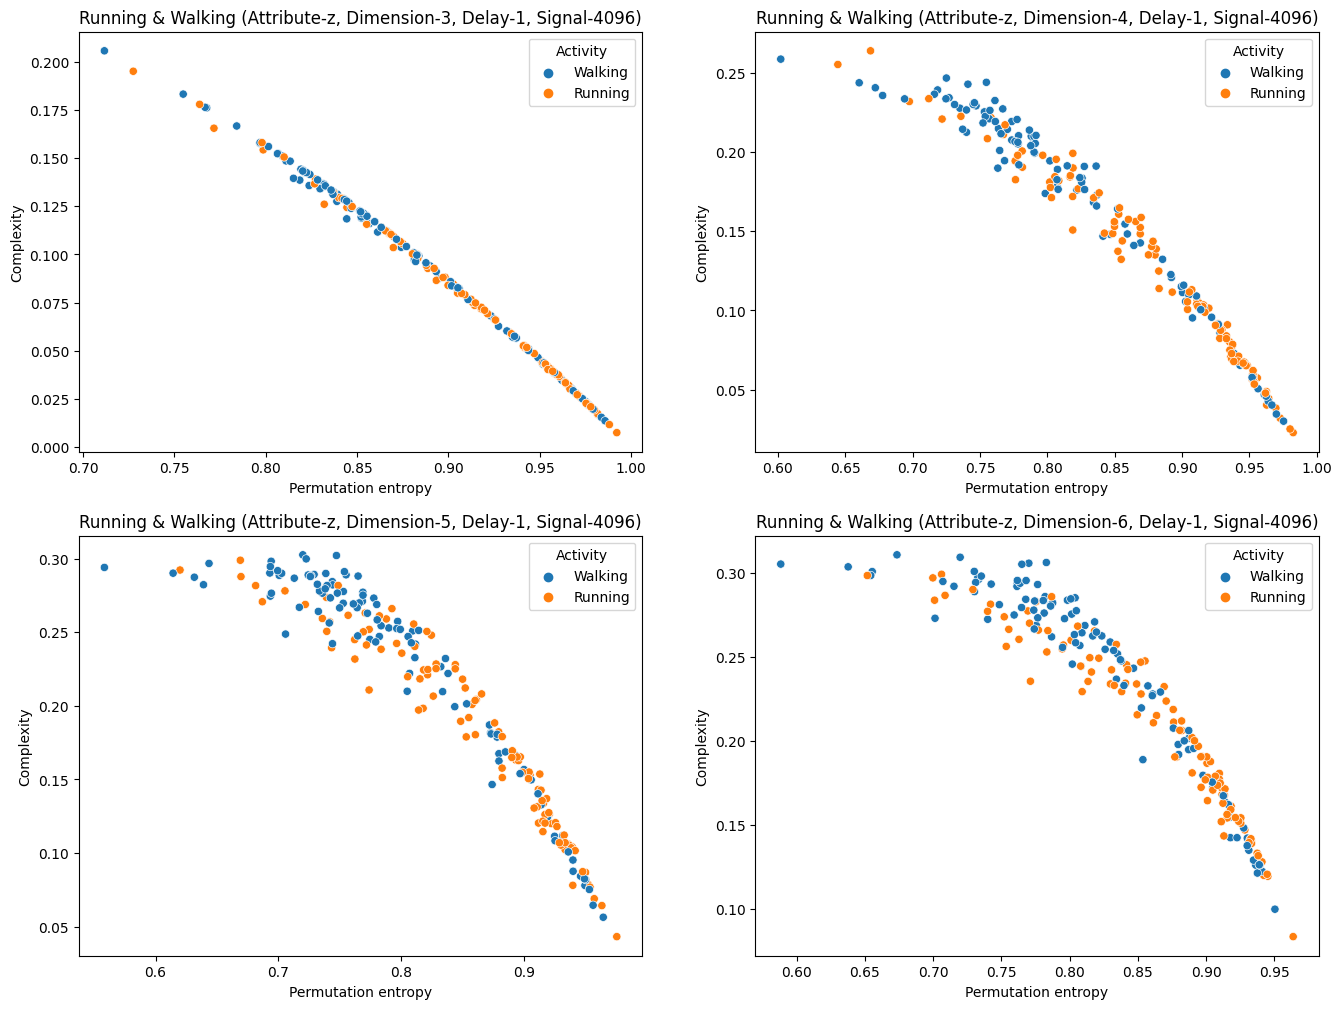

In [106]:
#creating scatter plot for running and walking 

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (16, 12))
sns.scatterplot(x = df_rw_z_dim3['Permutation entropy'], y = df_rw_z_dim3['Complexity'], hue = df_rw_z_dim3['Activity'], data = df_rw_z_dim3, ax = ax1).set(title = 'Running & Walking (Attribute-z, Dimension-3, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_z_dim4['Permutation entropy'], y = df_rw_z_dim4['Complexity'], hue = df_rw_z_dim4['Activity'], data = df_rw_z_dim4, ax = ax2).set(title = 'Running & Walking (Attribute-z, Dimension-4, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_z_dim5['Permutation entropy'], y = df_rw_z_dim5['Complexity'], hue = df_rw_z_dim5['Activity'], data = df_rw_z_dim5, ax = ax3).set(title = 'Running & Walking (Attribute-z, Dimension-5, Delay-1, Signal-4096)')
sns.scatterplot(x = df_rw_z_dim6['Permutation entropy'], y = df_rw_z_dim6['Complexity'], hue = df_rw_z_dim6['Activity'], data = df_rw_z_dim6, ax = ax4).set(title = 'Running & Walking (Attribute-z, Dimension-6, Delay-1, Signal-4096)')


In [107]:
# here, we are assigning values to the axes and supplying values for dimensions 

df_ud_x = df_ud[(df_ud['Accelerometer axis'] == 'X') & (df_ud['Delay'] == 1) & (df_ud['Signal_length'] == 4096)]
df_ud_x_dim3 = df_ud_x[df_ud_x['Dimension'] == 3]
df_ud_x_dim4 = df_ud_x[df_ud_x['Dimension'] == 4]
df_ud_x_dim5 = df_ud_x[df_ud_x['Dimension'] == 5]
df_ud_x_dim6 = df_ud_x[df_ud_x['Dimension'] == 6]

[Text(0.5, 1.0, 'Climbing up & Climbing down (Attribute-x, Dimension-6, Delay-1, Signal-4096)')]

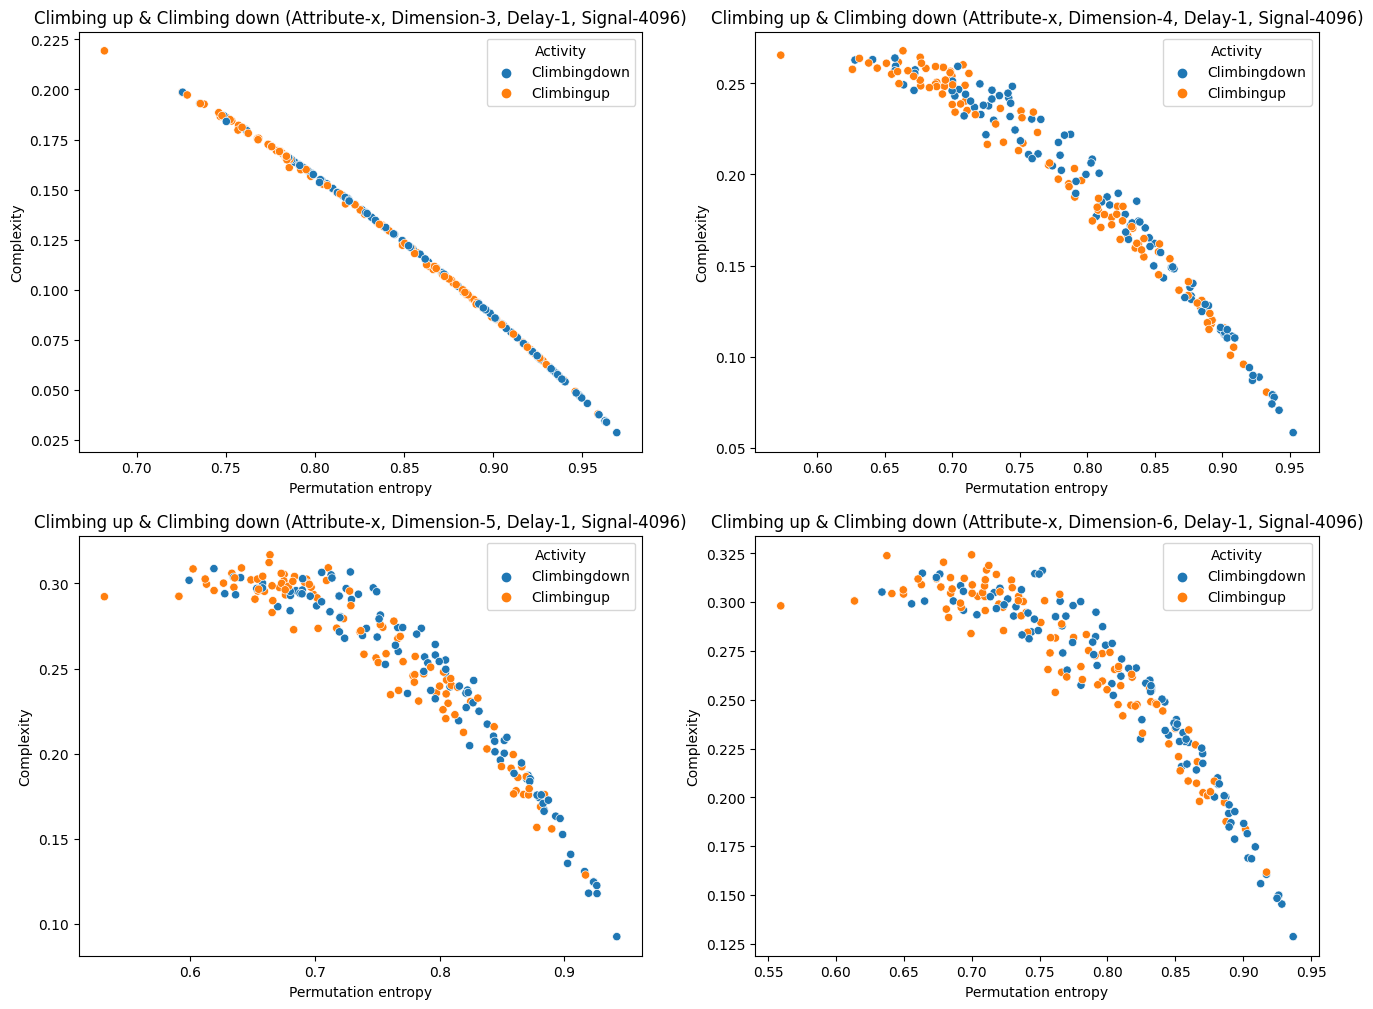

In [108]:
#creating scatter plot for climbing up and climbing down

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (16,12))
sns.scatterplot(x = df_ud_x_dim3['Permutation entropy'], y = df_ud_x_dim3['Complexity'], hue = df_ud_x_dim3['Activity'], data = df_ud_x_dim3, ax = ax1).set(title = 'Climbing up & Climbing down (Attribute-x, Dimension-3, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_x_dim4['Permutation entropy'], y = df_ud_x_dim4['Complexity'], hue = df_ud_x_dim4['Activity'], data = df_ud_x_dim4, ax = ax2).set(title = 'Climbing up & Climbing down (Attribute-x, Dimension-4, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_x_dim5['Permutation entropy'], y = df_ud_x_dim5['Complexity'], hue = df_ud_x_dim5['Activity'], data = df_ud_x_dim5, ax = ax3).set(title = 'Climbing up & Climbing down (Attribute-x, Dimension-5, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_x_dim6['Permutation entropy'], y = df_ud_x_dim6['Complexity'], hue = df_ud_x_dim6['Activity'], data = df_ud_x_dim6, ax = ax4).set(title = 'Climbing up & Climbing down (Attribute-x, Dimension-6, Delay-1, Signal-4096)')


In [71]:
# here, we are assigning values to the axes and supplying values for dimensions 

df_ud_y = df_ud[(df_ud['Accelerometer axis'] == 'Y') & (df_ud['Delay'] == 1) & (df_ud['Signal_length'] == 4096)]
df_ud_y_dim3 = df_ud_y[df_ud_y['Dimension'] == 3]
df_ud_y_dim4 = df_ud_y[df_ud_y['Dimension'] == 4]
df_ud_y_dim5 = df_ud_y[df_ud_y['Dimension'] == 5]
df_ud_y_dim6 = df_ud_y[df_ud_y['Dimension'] == 6]

[Text(0.5, 1.0, 'Climbing up & Climbing down (Attribute-y, Dimension-6, Delay-1, Signal-4096)')]

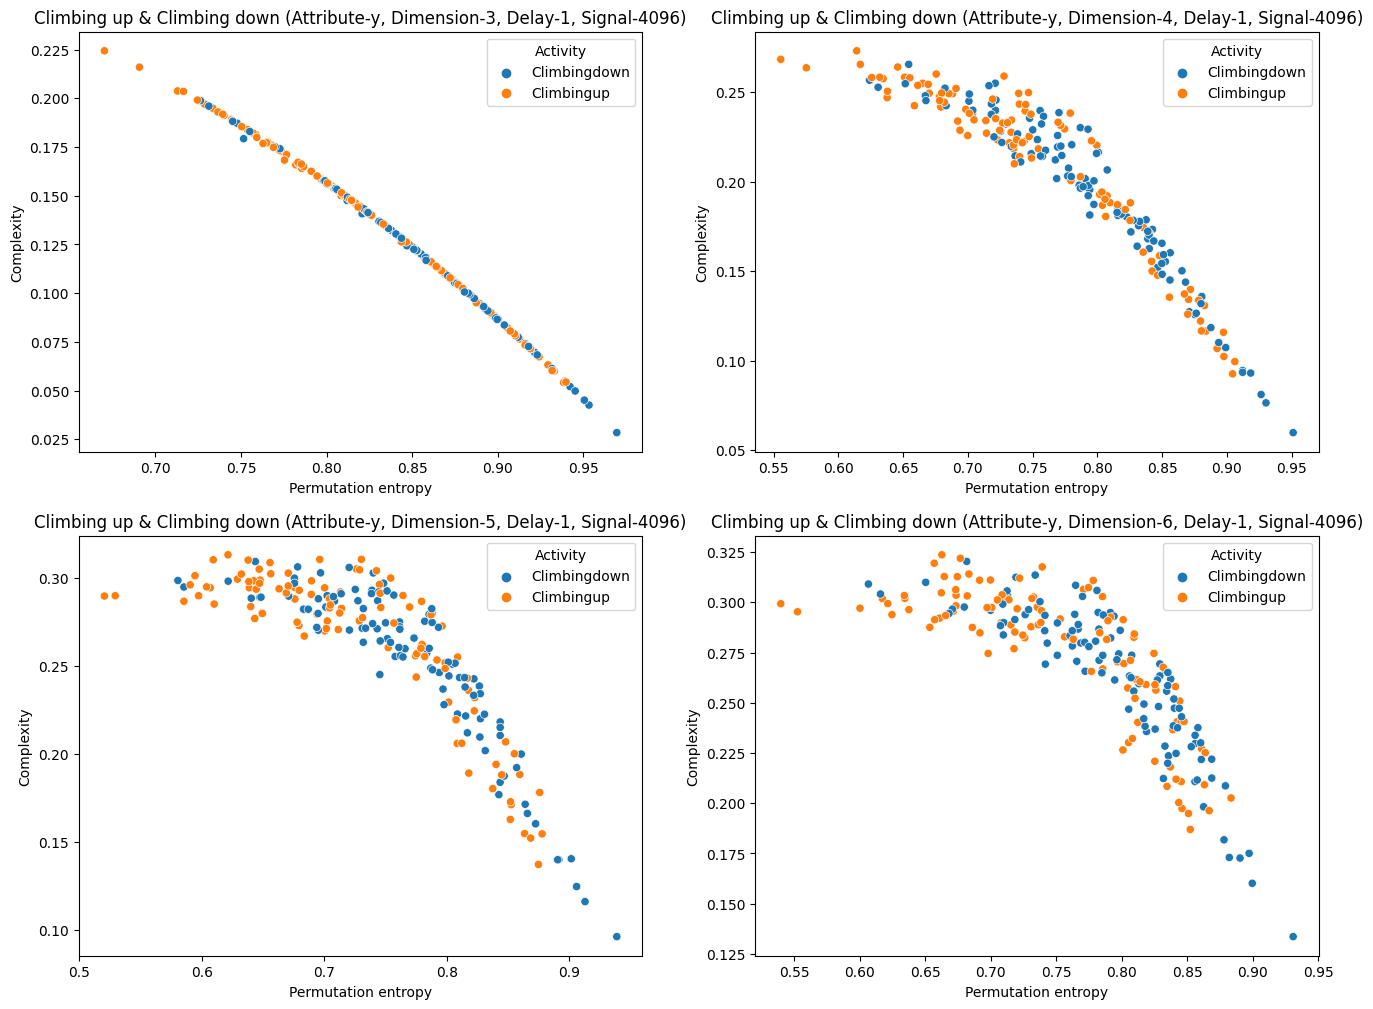

In [109]:
#creating scatter plot for climbing up and climbing down

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (16, 12))
sns.scatterplot(x = df_ud_y_dim3['Permutation entropy'], y = df_ud_y_dim3['Complexity'], hue = df_ud_y_dim3['Activity'], data = df_ud_y_dim3, ax = ax1).set(title = 'Climbing up & Climbing down (Attribute-y, Dimension-3, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_y_dim4['Permutation entropy'], y = df_ud_y_dim4['Complexity'], hue = df_ud_y_dim4['Activity'], data = df_ud_y_dim4, ax = ax2).set(title = 'Climbing up & Climbing down (Attribute-y, Dimension-4, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_y_dim5['Permutation entropy'], y = df_ud_y_dim5['Complexity'], hue = df_ud_y_dim5['Activity'], data = df_ud_y_dim5, ax = ax3).set(title = 'Climbing up & Climbing down (Attribute-y, Dimension-5, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_y_dim6['Permutation entropy'], y = df_ud_y_dim6['Complexity'], hue = df_ud_y_dim6['Activity'], data = df_ud_y_dim6, ax = ax4).set(title = 'Climbing up & Climbing down (Attribute-y, Dimension-6, Delay-1, Signal-4096)')


In [110]:
# here, we are assigning values to the axes and supplying values for dimensions

df_ud_z = df_ud[(df_ud['Accelerometer axis'] == 'Z') & (df_ud['Delay'] == 1) & (df_ud['Signal_length'] == 4096)]
df_ud_z_dim3 = df_ud_z[df_ud_z['Dimension'] == 3]
df_ud_z_dim4 = df_ud_z[df_ud_z['Dimension'] == 4]
df_ud_z_dim5 = df_ud_z[df_ud_z['Dimension'] == 5]
df_ud_z_dim6 = df_ud_z[df_ud_z['Dimension'] == 6]

[Text(0.5, 1.0, 'Climbing up & Climbing down (Attribute-z, Dimension-6, Delay-1, Signal-4096)')]

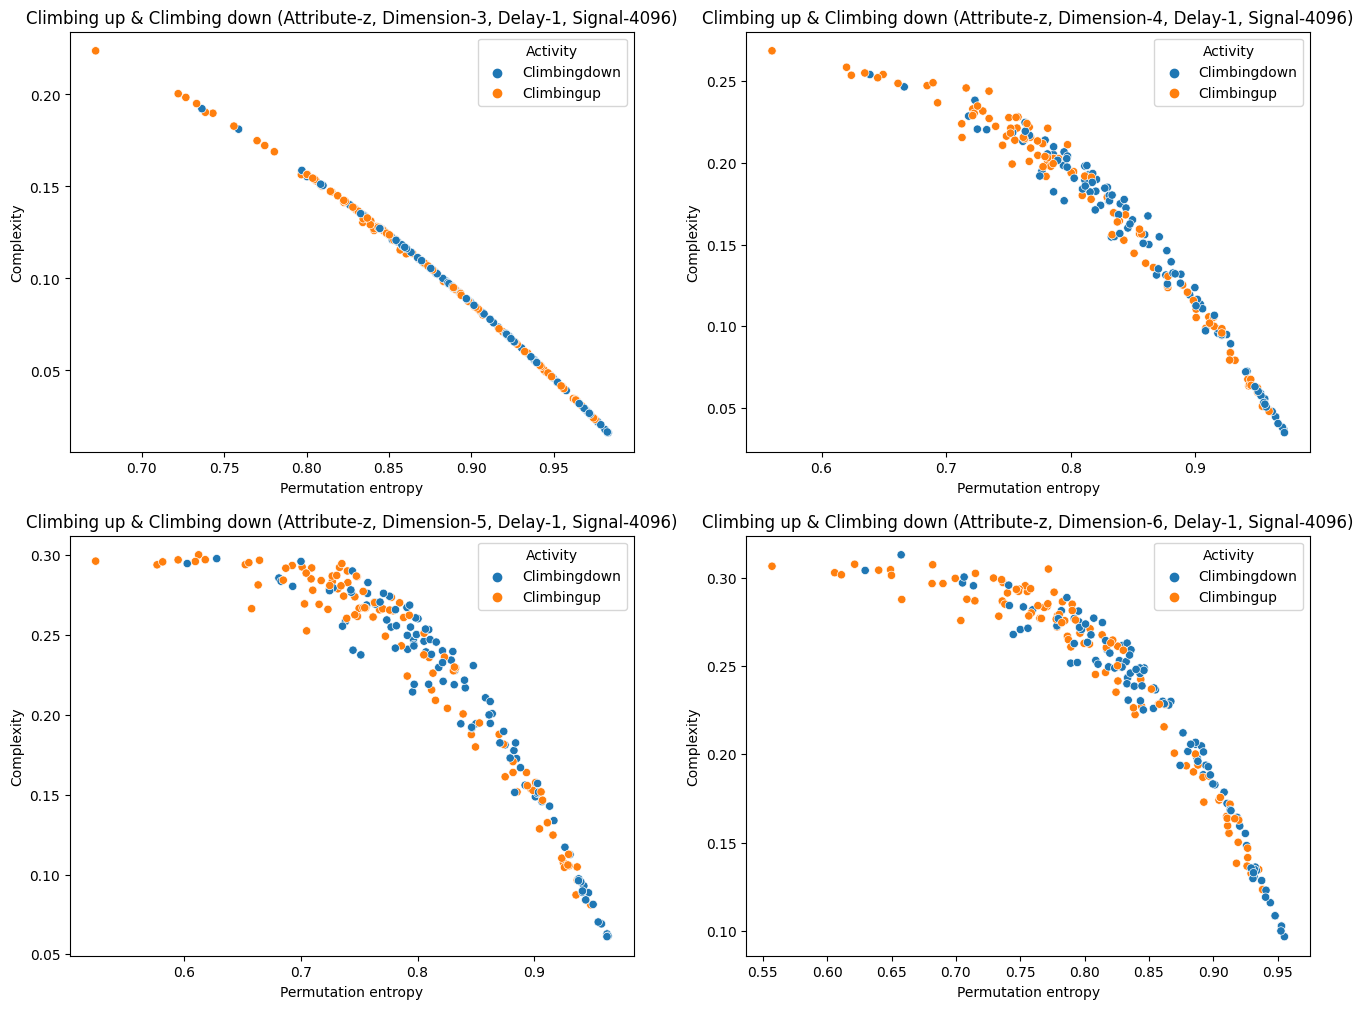

In [111]:
#creating scatter plot for climbing up and climbing down

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (16, 12))
sns.scatterplot(x = df_ud_z_dim3['Permutation entropy'], y = df_ud_z_dim3['Complexity'], hue = df_ud_z_dim3['Activity'], data = df_ud_z_dim3, ax = ax1).set(title = 'Climbing up & Climbing down (Attribute-z, Dimension-3, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_z_dim4['Permutation entropy'], y = df_ud_z_dim4['Complexity'], hue = df_ud_z_dim4['Activity'], data = df_ud_z_dim4, ax = ax2).set(title = 'Climbing up & Climbing down (Attribute-z, Dimension-4, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_z_dim5['Permutation entropy'], y = df_ud_z_dim5['Complexity'], hue = df_ud_z_dim5['Activity'], data = df_ud_z_dim5, ax = ax3).set(title = 'Climbing up & Climbing down (Attribute-z, Dimension-5, Delay-1, Signal-4096)')
sns.scatterplot(x = df_ud_z_dim6['Permutation entropy'], y = df_ud_z_dim6['Complexity'], hue = df_ud_z_dim6['Activity'], data = df_ud_z_dim6, ax = ax4).set(title = 'Climbing up & Climbing down (Attribute-z, Dimension-6, Delay-1, Signal-4096)')


**END**